
Actor-Critic is a reinforcement learning algorithm that combines an actor (learns a policy) and a critic (estimates the value function). The actor takes actions based on the policy, and the critic provides feedback on the action

In [19]:
import numpy as np
import matplotlib.pyplot as plt



In [58]:

# Initialization
A = np.array([[0.9993, 0.0785, 0.0014, -0.0001],
              [-0.0012, 0.9640, 0.0336, -0.0024],
              [-0.0645, -0.0026, 0.8716, -0.1283],
              [0.0060, 0.0002, 0.0000, 1.0000]])

B = np.array([[0.0001],
              [0.0024],
              [0.1283],
              [0.0000]])

Q = np.random.rand(4, 4)
R = np.random.rand(1, 1)
Xk = np.random.rand(4, 1)
Wa = np.random.rand(1, 4)
Wc = np.random.rand(5, 5)
Wcue = Wc[-1, :-1]  # 1x4 Wcue
Wcuu = Wc[-1, -1]   # 1x1 Wcuu
print(Wcue)

[0.91296021 0.10628788 0.33932306 0.01202346]


In [59]:
# Learning rates
alpha_a = 0.05
alpha_c = 0.05


In [66]:
# Initialize variables
Uk = np.dot(Wa, Xk)
U_aggregate = [Uk]
X_aggregate = [Xk]

ZK = np.zeros((5, 1))
ZK1 = np.zeros((5, 1))
i = 1


In [79]:

# Model-Free Reinforcement Learning
# Wcue = Wc[-1, :-1].reshape(-1, 1)  # Reshape as column vector
# Wcuu = Wc[-1, -1]  # Scalar value

while True:
    Xk1 = np.dot(A, Xk) + np.dot(B, Uk)

    ZK[0, 0] = Xk[0,0]
    ZK[1, 0] = Xk[1,0]
    ZK[2, 0] = Xk[2,0]
    ZK[3, 0] = Xk[3,0]
    ZK[4, 0] = Uk
    # print(Wcuu)
    # print(Wcue)
    # print(Xk1)
    uk1_est = (-1/Wcuu) * np.dot(Wcue, Xk1)

    ZK1[0, 0] = Xk1[0,0]
    ZK1[1, 0] = Xk1[1,0]
    ZK1[2, 0] = Xk1[2,0]
    ZK1[3, 0] = Xk1[3,0]
    ZK1[4, 0] = uk1_est

    q_approx = 0.5 * np.dot(np.dot(ZK.T, Wc), ZK)
    cost = 0.5 * (np.dot(np.dot(Xk.T, Q), Xk) + np.dot(np.dot(Uk.T, R), Uk))
    qk1 = 0.5 * np.dot(np.dot(ZK1.T, Wc), ZK1)
    q_desired = cost + qk1
    Wc_new = Wc - alpha_c * (q_approx - q_desired) * np.dot(ZK, ZK.T)
    # print( np.dot(Wc, Xk))
    # print(B)
    U_approx = np.dot(Wa, Xk)
    U_desired = -1 / Wcuu * np.dot(Wcue.T, Xk)

    Wa_new = Wa - alpha_a * np.dot((U_approx - U_desired), Xk.T)

    Uk1 = np.dot(Wa_new, Xk1)

    if np.allclose(Wc, Wc_new):
        break

    Wc = Wc_new
    Wa = Wa_new
    Xk = Xk1
    Uk = Uk1

    U_aggregate.append(Uk1)
    X_aggregate.append(Xk1)

    i += 1


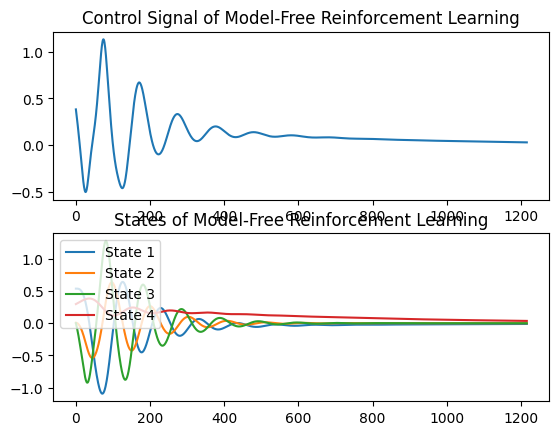

In [84]:
# Convert X_aggregate to NumPy array
X_aggregate = np.array(X_aggregate)

# Plotting Model-Free Reinforcement Learning results
plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot(np.array(U_aggregate).ravel())  # Convert U_aggregate to NumPy array and reshape to 1D
plt.title('Control Signal of Model-Free Reinforcement Learning')

plt.subplot(2, 1, 2)
plt.plot(X_aggregate[:, 0], label='State 1')
plt.plot(X_aggregate[:, 1], label='State 2')
plt.plot(X_aggregate[:, 2], label='State 3')
plt.plot(X_aggregate[:, 3], label='State 4')
plt.title('States of Model-Free Reinforcement Learning')
plt.legend()


In [85]:
# Reset variables for Model-Based Reinforcement Learning
Xk = np.random.rand(4, 1)
Wa = np.random.rand(1, 4)
Wc = np.random.rand(4, 4)
U_aggregate = [np.dot(Wa, Xk)]
X_aggregate = [Xk]

ZK = np.zeros((4, 1))
ZK1 = np.zeros((4, 1))
i = 1

In [86]:

# Model-Based Reinforcement Learning
while True:
    Xk1 = np.dot(A, Xk) + np.dot(B, Uk)

    ZK[:4, :] = Xk
    ZK1[:4, :] = Xk1

    q_approx = 0.5 * np.dot(np.dot(ZK.T, Wc), ZK)
    cost = 0.5 * (np.dot(np.dot(Xk.T, Q), Xk) + np.dot(np.dot(Uk.T, R), Uk))
    qk1 = 0.5 * np.dot(np.dot(ZK1.T, Wc), ZK1)
    q_desired = cost + qk1
    Wc_new = Wc - alpha_c * (q_approx - q_desired) * np.dot(ZK, ZK.T)

    U_approx = np.dot(Wa, Xk)
    U_desired = -np.linalg.pinv(R) * np.dot(B.T, np.dot(Wc, Xk))
    Wa_new = Wa - alpha_a * np.dot((U_approx - U_desired), Xk.T)

    Uk1 = np.dot(Wa_new, Xk1)

    if np.allclose(Wc, Wc_new):
        break

    Wc = Wc_new
    Wa = Wa_new
    Xk = Xk1
    Uk = Uk1

    U_aggregate.append(Uk1)
    X_aggregate.append(Xk1)

    i += 1


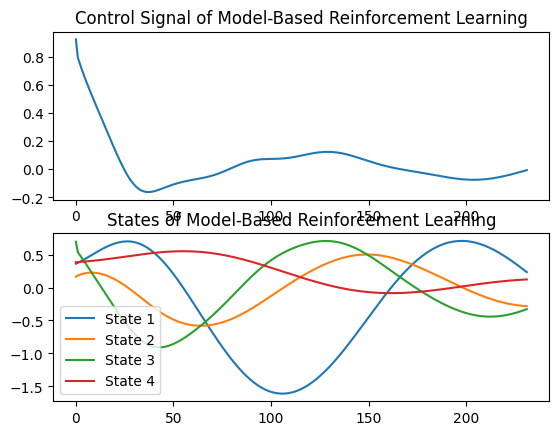

In [91]:
# Extract control signal values from U_aggregate
control_signal = [U[0] for U in U_aggregate]

# Extract individual state variables from X_aggregate
state_1 = [X[0][0] for X in X_aggregate]
state_2 = [X[1][0] for X in X_aggregate]
state_3 = [X[2][0] for X in X_aggregate]
state_4 = [X[3][0] for X in X_aggregate]

# Plotting Model-Based Reinforcement Learning results
plt.figure(2)
plt.subplot(2, 1, 1)
plt.plot(control_signal)
plt.title('Control Signal of Model-Based Reinforcement Learning')

plt.subplot(2, 1, 2)
plt.plot(state_1, label='State 1')
plt.plot(state_2, label='State 2')
plt.plot(state_3, label='State 3')
plt.plot(state_4, label='State 4')
plt.title('States of Model-Based Reinforcement Learning')
plt.legend()

plt.show()



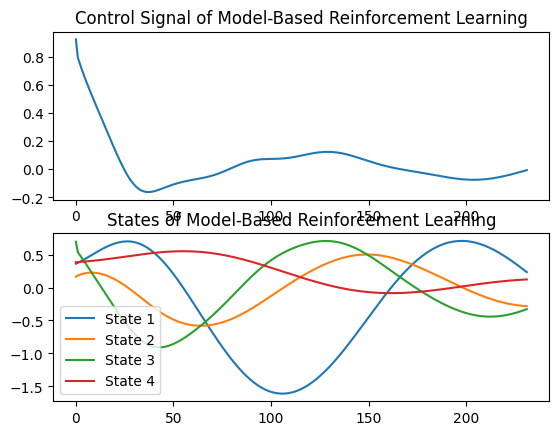

In [90]:
# Convert X_aggregate to NumPy array
X_aggregate = np.array(X_aggregate)

# Plotting Model-Free Reinforcement Learning results
plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot(np.array(U_aggregate).ravel())  # Convert U_aggregate to NumPy array and reshape to 1D
plt.title('Control Signal of Model-Free Reinforcement Learning')

plt.subplot(2, 1, 2)
plt.plot(X_aggregate[:, 0], label='State 1')
plt.plot(X_aggregate[:, 1], label='State 2')
plt.plot(X_aggregate[:, 2], label='State 3')
plt.plot(X_aggregate[:, 3], label='State 4')
plt.title('States of Model-Free Reinforcement Learning')
plt.legend()